In [76]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display



In [77]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("Cancer.keys():\n{}".format(cancer.keys()))

Cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [78]:
print("shape of cancer data:{}".format(cancer.data.shape))

shape of cancer data:(569, 30)


In [79]:
#クラスごとのサンプル数　良性：悪性
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [80]:
#特徴量名
print("Feature Names:{}".format(cancer.feature_names))

Feature Names:['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,Y_train,Y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state=66)

In [82]:
training_accuracy = []
test_accuracy = []
#n_neighborsを1から10まで試す
neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings:
    #モデルを構築
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, Y_train)
    #訓練セット制度を記録
    training_accuracy.append(clf.score(X_train, Y_train))
    #汎化精度を記録
    test_accuracy.append(clf.score(X_test, Y_test))

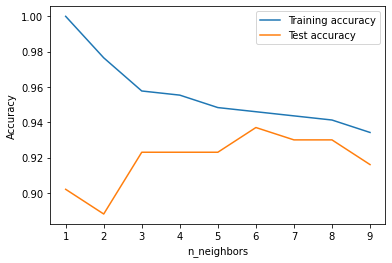

In [83]:
plt.plot(neighbors_settings,training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings,test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


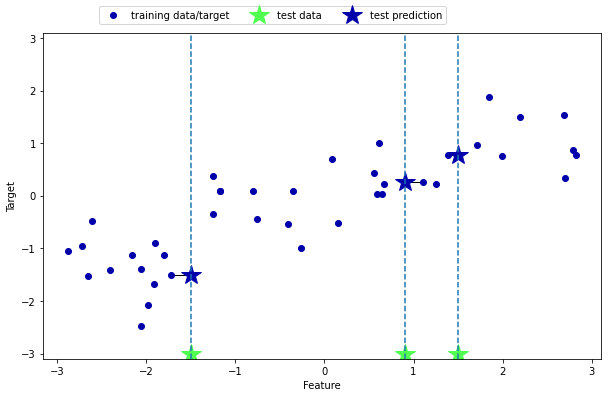

In [84]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

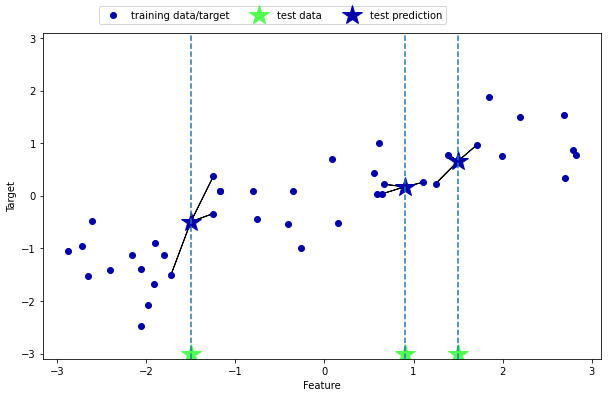

In [85]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [86]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

#waveデータセットを訓練セットとテストセットに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
#訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [87]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [88]:
print("Test set R^2:{:.2f}".format(reg.score(X_test,y_test)))

Test set R^2:0.83


w[0]: 0.393906  b: -0.031804


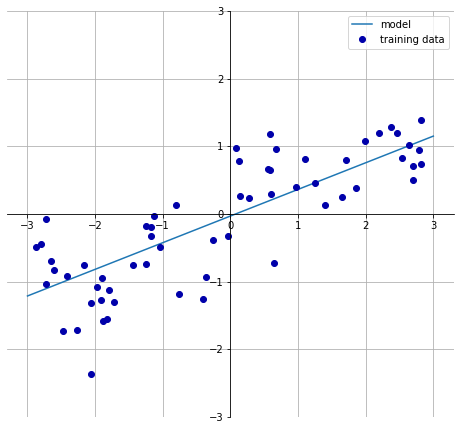

In [89]:
#linear model

mglearn.plots.plot_linear_regression_wave()

In [90]:
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples =60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42)

lr = LinearRegression().fit(X_train,y_train)

In [91]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept:-0.031804343026759746


In [92]:
print("Training set score:{:.2f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))


Training set score:0.67
Test set score:0.66


Training set score:0.67
Test set score:0.66

↑精度は高くないが、訓練セットとテストセットに対する値が非常に近い。
適合不足であって、過剰適合ではないことがわかる

In [93]:
X,y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [94]:
print("Training set score:{:.2f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))


Training set score:0.95
Test set score:0.61


Training set score:0.95 
Test set score:0.61

↑性能が大きく異なるため、過剰適合が起きている。

In [95]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test, y_test)))

Training set score:0.89
Test set score:0.75


In [96]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test, y_test)))

Training set score:0.79
Test set score:0.64


In [97]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test, y_test)))

Training set score:0.79
Test set score:0.64


## alphaパラメータのモデルへの影響グラフ化

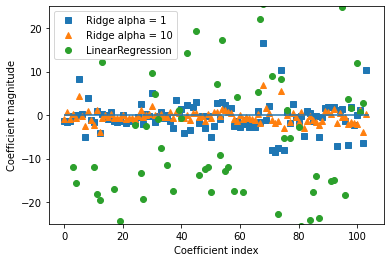

In [98]:
plt.plot(ridge.coef_,'s',label = "Ridge alpha = 1")
plt.plot(ridge10.coef_,'^',label = "Ridge alpha = 10")

plt.plot(lr.coef_,'o',label = "LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


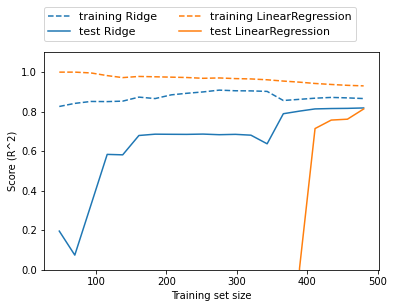

In [99]:
mglearn.plots.plot_ridge_n_samples()

## Lasso

In [100]:
from sklearn.linear_model import Lasso
#alpha = 1.0(deffault)
lasso = Lasso().fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test, y_test)))
print("Number of futures used:{}".format(np.sum(lasso.coef_ !=0)))

Training set score:0.29
Test set score:0.21
Number of futures used:4


In [101]:
#適合不足解消のために、"Max_iter"の値を増やす
lasso001 = Lasso(alpha =0.01, max_iter =100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of futures used:{}".format(np.sum(lasso001.coef_ !=0)))

Training set score:0.90
Test set score:0.77
Number of futures used:33


In [102]:
lasso00001 = Lasso(alpha =0.0001, max_iter =100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of futures used:{}".format(np.sum(lasso00001.coef_ !=0)))

Training set score:0.95
Test set score:0.64
Number of futures used:96


Text(0, 0.5, 'Coefficient magnitude')

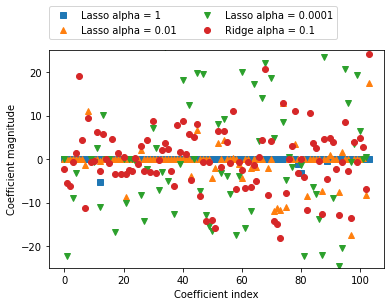

In [103]:
plt.plot(lasso.coef_,'s',label = "Lasso alpha = 1")
plt.plot(lasso001.coef_,'^',label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_,'v',label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_,'o',label = "Ridge alpha = 0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## DecisionTree

In [104]:
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.937


In [105]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.951


In [106]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot",class_names= ["malignant","benign"],feature_names= cancer.feature_names,impurity=False, filled = True)

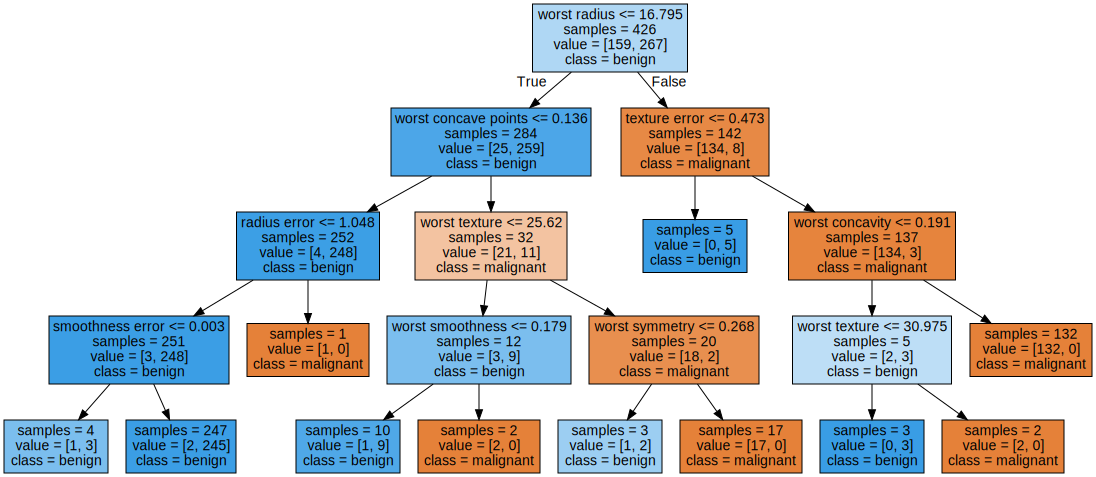

In [107]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [108]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [109]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


plot_feature_importances_cancer(tree)

SyntaxError: invalid syntax (1622947836.py, line 5)

Feature importances: [0. 1.]


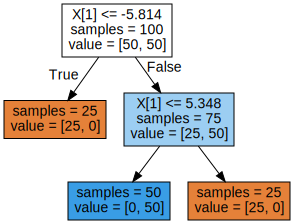

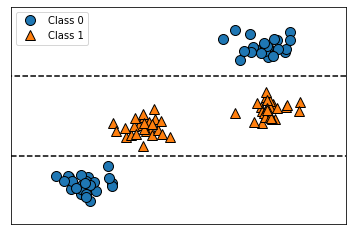

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

## Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 100, noise=0.25,random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state = 42)

forest = RandomForestClassifier(n_estimators =5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

Text(0.5, 1.0, 'Random Forest')

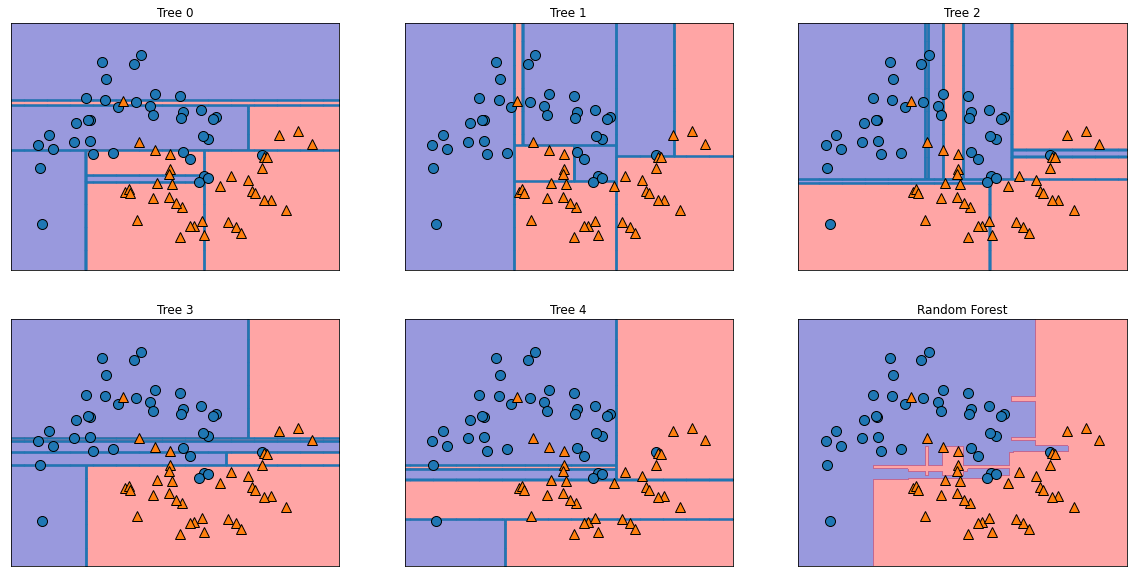

In [111]:
fig, axes = plt.subplots(2,3,figsize=(20,10))

for i , (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree, ax=ax)

mglearn.plots.plot_2d_separator(forest,X_train,fill=True, ax=axes[-1,-1],alpha=.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
axes[-1,-1].set_title("Random Forest")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)

forest = RandomForestClassifier(n_estimators = 100,random_state = 0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


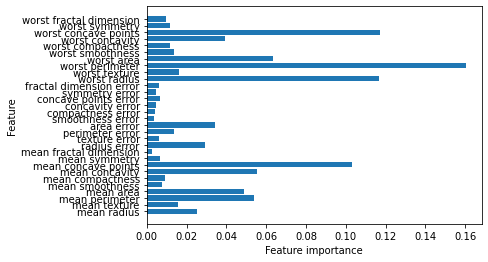

In [ ]:
plot_feature_importances_cancer(forest)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,Y_train,Y_test = train_test_split(cancer.data,cancer.target,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,Y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.965


In [ ]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth =1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set:0.991
Accuracy on test set:0.972


In [ ]:
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.965


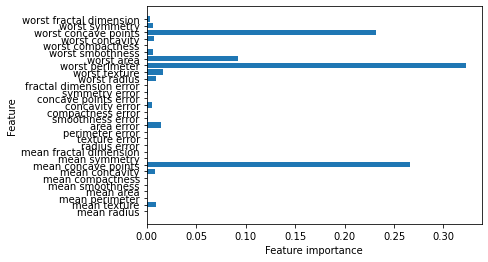

In [ ]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth =1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)